In [1]:
import pandas as pd
import numpy as np
import os
from helper import *
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
# simply put osm files into the data-dir (all will get evaluated)
EVAL_DIR = "/home/felix/todo/osm-tmp"
SRTM_DIR = "/home/felix/todo/osm/srtm"
# kmeans, merge, hop
MLP_METHODS = ["kmeans", "merge", "hop"]
MLP_LAYERS = [250, 500, 750, 1_000, 1_500, 2_000, 3_000, 4_000, 6_000, 8_000, 12_000]
FAST_QUERY_METHODS = ["crp", "pch", "prp"]
QUERY_METHODS = ["normal", "bi"] + FAST_QUERY_METHODS
EVAL_FILE = os.path.join(EVAL_DIR, "saarland.eval")
EVAL_AMOUNTS = 10_000
AREAS = ["saarland"]

In [3]:
df = pd.DataFrame()
for area in AREAS:
    for method in QUERY_METHODS:
        for mlp in MLP_METHODS:
            for partitions in MLP_LAYERS:
                if method == "normal" or method == "bi":
                    tmp = pd.read_json("/home/felix/todo/osm-tmp/" + area + "-" + method + "-time.json")
                else:
                    tmp = pd.read_json("/home/felix/todo/osm-tmp/" + area + "-" + mlp + "-" + str(partitions) + "-" + method + "-time.json")
                tmp["method"] = method
                tmp["area"] = area
                tmp["mlp"] = mlp
                tmp["mlp_partitions"] = partitions
                df = df.append(tmp, ignore_index = True)

In [6]:
data = list()
labels = list()
for area in AREAS:
    for method in FAST_QUERY_METHODS:
        for partitions in MLP_LAYERS:
            for mlp_method in MLP_METHODS:
                tmp = df[(df.method == method) & (df.area == area) & (df.mlp_partitions == partitions) & (df.mlp == mlp_method)]
                data.append(tmp["time"])
                labels.append(method + "-" + area + "-" + str(partitions) + "-" + str(mlp_method))

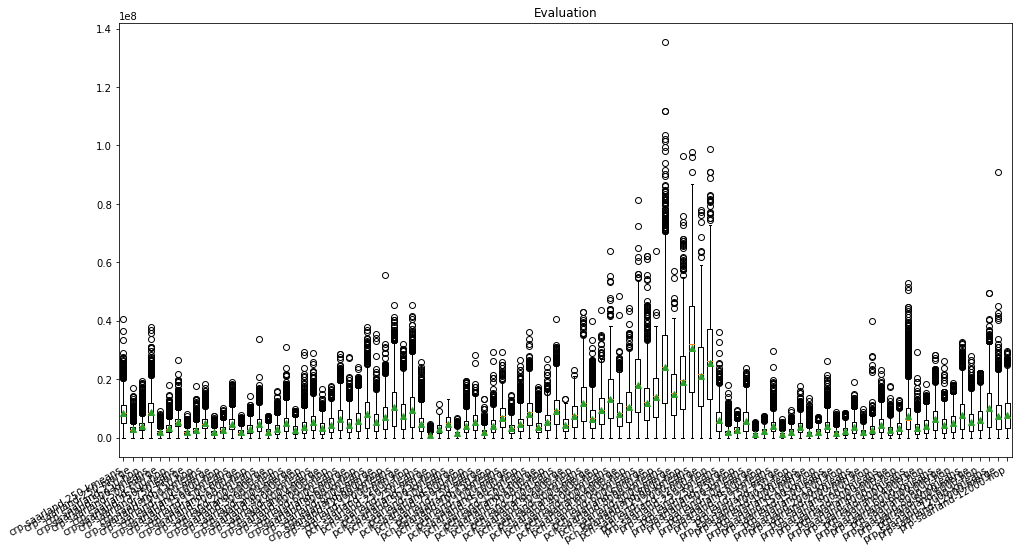

In [7]:
fig, ax = plt.subplots()
ax.set_title('Evaluation')
ax.boxplot(data, labels=labels, showmeans=True)
plt.xticks(rotation=30, ha='right')
plt.savefig("comparison.png")
plt.show()

crp 250 9.318793110519236
crp 500 8.934031473865193
crp 750 15.079815065851838
crp 1000 16.25162776480645
crp 1500 16.974394995183637
crp 2000 17.072645449368203
crp 3000 16.242061709329533
crp 4000 14.880176726099693
crp 6000 12.172598120860332
crp 8000 9.724265230561013
crp 12000 7.677825056402116
crp 250 27.051491332065236
crp 500 40.79476797797484
crp 750 43.288310245457836
crp 1000 44.975075822123024
crp 1500 42.60054264923803
crp 2000 38.01357393135121
crp 3000 30.20218104183284
crp 4000 24.223895817078454
crp 6000 18.212252514717857
crp 8000 14.940865990856357
crp 12000 10.516164245743987
crp 250 19.192961565320417
crp 500 24.645204532872544
crp 750 30.690262847167016
crp 1000 29.861691119931677
crp 1500 26.981792387127935
crp 2000 26.98161538648071
crp 3000 21.652603017490875
crp 4000 18.007049977817452
crp 6000 13.975100003317982
crp 8000 11.279369273617947
crp 12000 8.486259554677298
pch 250 16.73719444065929
pch 500 16.60798291774746
pch 750 15.207962232973962
pch 1000 11.55

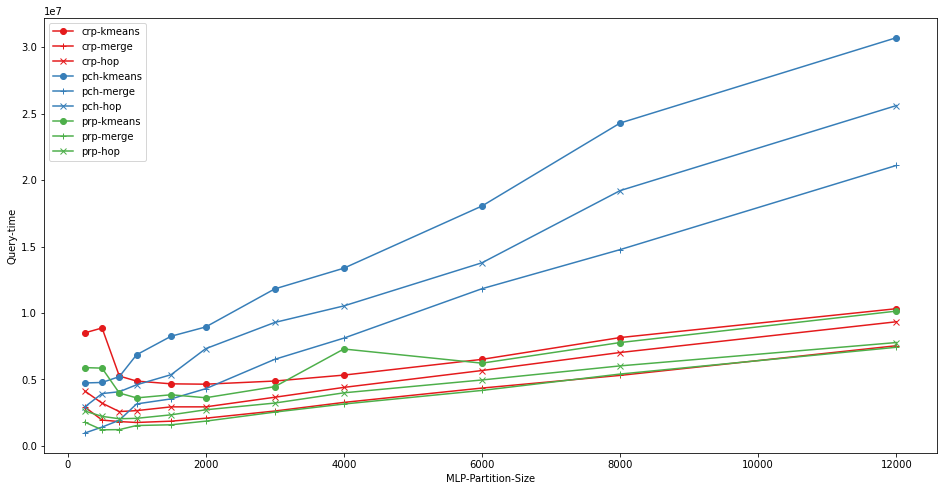

In [8]:
markers = ['o', '+', 'x', '*', '.']
for area in AREAS:
    dijkstra = df[(df.method == "normal") & (df.area == area)]["time"].mean()
    bidijkstra = df[(df.method == "bi") & (df.area == area)]["time"].mean()
    for (i, method) in enumerate(FAST_QUERY_METHODS):
        color = plt.cm.Set1(i)
        for (mlp_method, marker) in zip(MLP_METHODS, markers):
            x = list()
            y = list()
            for partitions in MLP_LAYERS:
                tmp = df[(df.method == method) & (df.area == area) & (df.mlp_partitions == partitions) & (df.mlp == mlp_method)]
                x.append(partitions)
                y.append(tmp["time"].mean())
                speedup = dijkstra / tmp["time"].mean()
                print(method, partitions, speedup)
            plt.plot(x, y, marker=marker, color=color, label=method + "-" + mlp_method)

plt.xlabel("MLP-Partition-Size")
plt.ylabel("Query-time")
plt.legend(loc='upper left')
plt.savefig("single-layer.png")
plt.show()